<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/Modul_PID_Controller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proportional, Integral, Derrivative Controller #

Kontroler PID (Proportional-Integral-Derivative) adalah jenis sistem pengendali umpan balik (feedback control system) yang digunakan untuk menjaga variabel proses agar tetap pada nilai yang diinginkan (setpoint) dengan cara menghitung dan mengoreksi error berdasarkan tiga komponen utama

In [2]:
!pip install control matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.5 MB/s eta 0:00:00


## Komponen Proportional (P) ##

Memberi aksi kendali yang sebanding dengan besarnya error saat ini. bagian dari sistem kendali yang memberikan aksi kendali berdasarkan besarnya error saat ini, yaitu selisih antara sinyal referensi (setpoint) dan keluaran aktual (output).

$$e(t)=r(t)-y(t)$$

$$U_p(t)=K_p.e(t)$$

## Contoh: ##
$$ G(s)=\frac{1}{s+2}$$
$$ C(s)=K_p $$

$$T(s)=\frac{K_pG(s)}{1+K_pG(s)}$$
$$T(s)=\frac{Kp}{s+2+Kp}$$





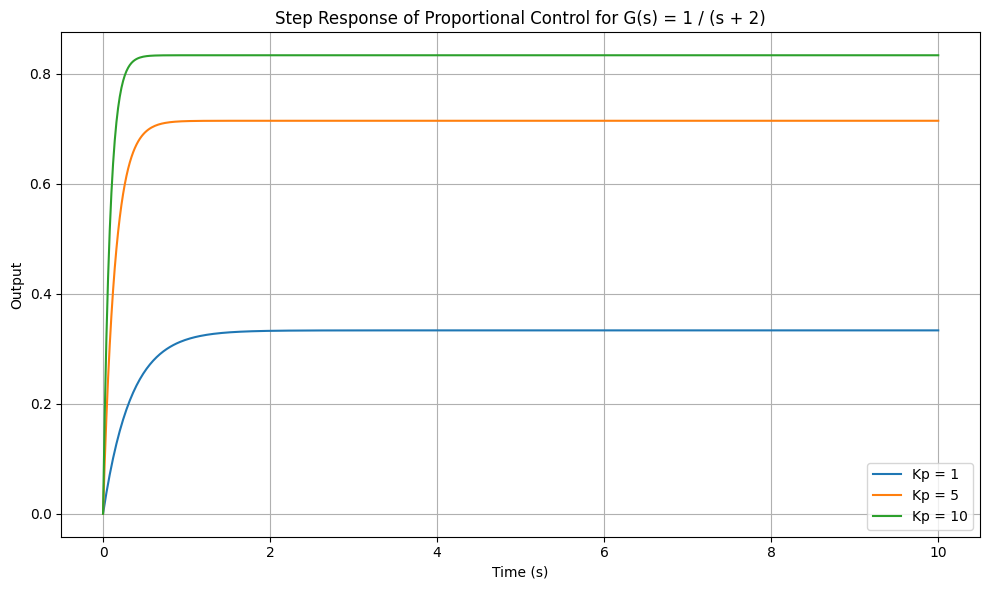

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant: G(s) = 1 / (s + 2)
G = ctrl.tf([1], [1, 2])

# Nilai-nilai Kp yang akan diuji
Kp_values = [1, 5, 10]
t = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 6))
for Kp in Kp_values:
    C = ctrl.tf([Kp], [1])  # C(s) = Kp
    T = ctrl.feedback(C * G, 1)  # Fungsi alih tertutup
    t_out, y_out = ctrl.step_response(T, T=t)
    plt.plot(t_out, y_out, label=f"Kp = {Kp}")

plt.title("Step Response of Proportional Control for G(s) = 1 / (s + 2)")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


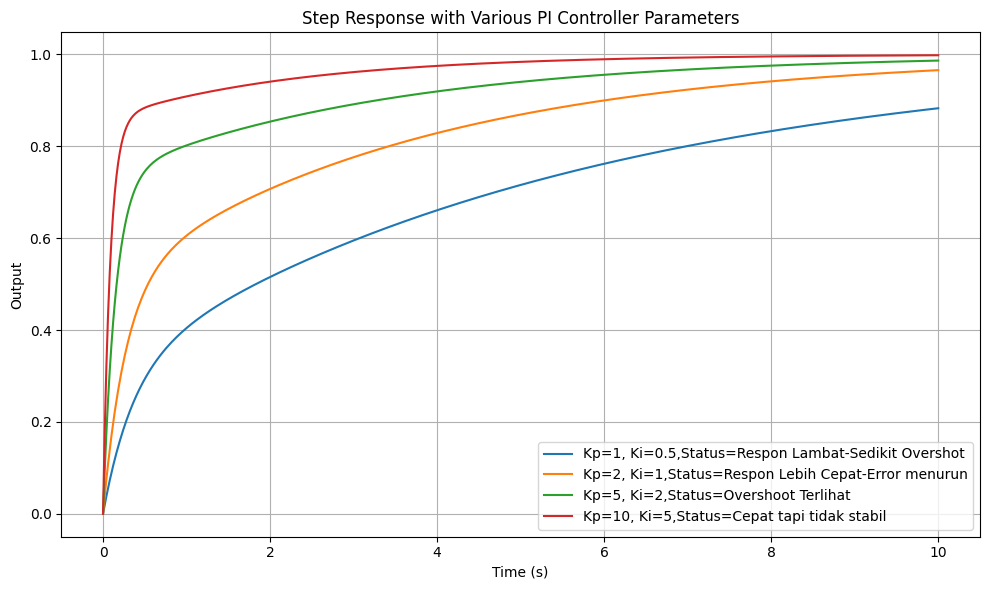

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant: G(s) = 1 / (s + 2)
G = ctrl.tf([1], [1, 2])

# Kombinasi parameter PI yang diuji
params = [(1, 0.5), (2, 1), (5, 2), (10, 5)]

# Vektor waktu
t = np.linspace(0, 10, 500)

# Plot
plt.figure(figsize=(10, 6))

for Kp, Ki in params:
    C = ctrl.tf([Kp, Ki], [1, 0])  # C(s) = (Kp*s + Ki)/s
    T = ctrl.feedback(C * G, 1)    # Fungsi alih tertutup
    t_out, y_out = ctrl.step_response(T, T=t)
    if (Kp==1):
      statr="Respon Lambat-Sedikit Overshot"
    elif(Kp==2):
      statr="Respon Lebih Cepat-Error menurun"
    elif(Kp==5):
      statr="Overshoot Terlihat"
    elif(Kp==10):
      statr="Cepat tapi tidak stabil"
    plt.plot(t_out, y_out, label=f"Kp={Kp}, Ki={Ki},Status={statr}")

plt.title("Step Response with Various PI Controller Parameters")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


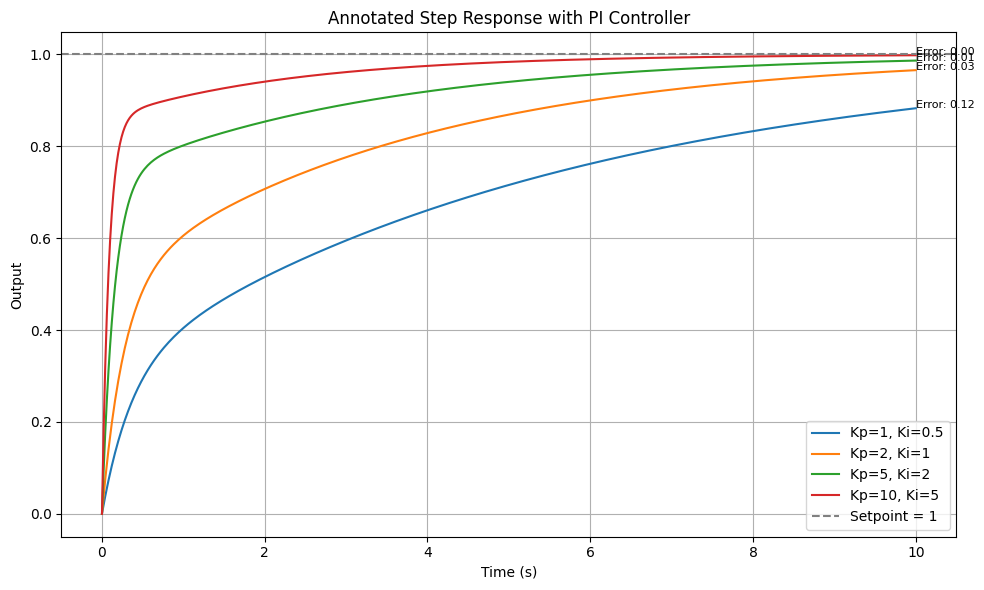

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant
G = ctrl.tf([1], [1, 2])
params = [(1, 0.5), (2, 1), (5, 2), (10, 5)]
t = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 6))

for Kp, Ki in params:
    C = ctrl.tf([Kp, Ki], [1, 0])
    T = ctrl.feedback(C * G, 1)
    t_out, y_out = ctrl.step_response(T, T=t)

    # Cari nilai maksimum (untuk overshoot)
    max_val = np.max(y_out)
    max_time = t_out[np.argmax(y_out)]

    # Plot utama
    plt.plot(t_out, y_out, label=f"Kp={Kp}, Ki={Ki}")

    # Tanda overshoot
    if max_val > 1:
        plt.plot(max_time, max_val, 'ro')  # tanda merah untuk overshoot
        plt.text(max_time, max_val + 0.02, f"Overshoot: {max_val:.2f}", color='red')

    # Tanda steady-state error
    ss_error = abs(1 - y_out[-1])
    plt.text(t_out[-1], y_out[-1], f"Error: {ss_error:.2f}", fontsize=8)

plt.axhline(1, color='gray', linestyle='--', label="Setpoint = 1")
plt.title("Annotated Step Response with PI Controller")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


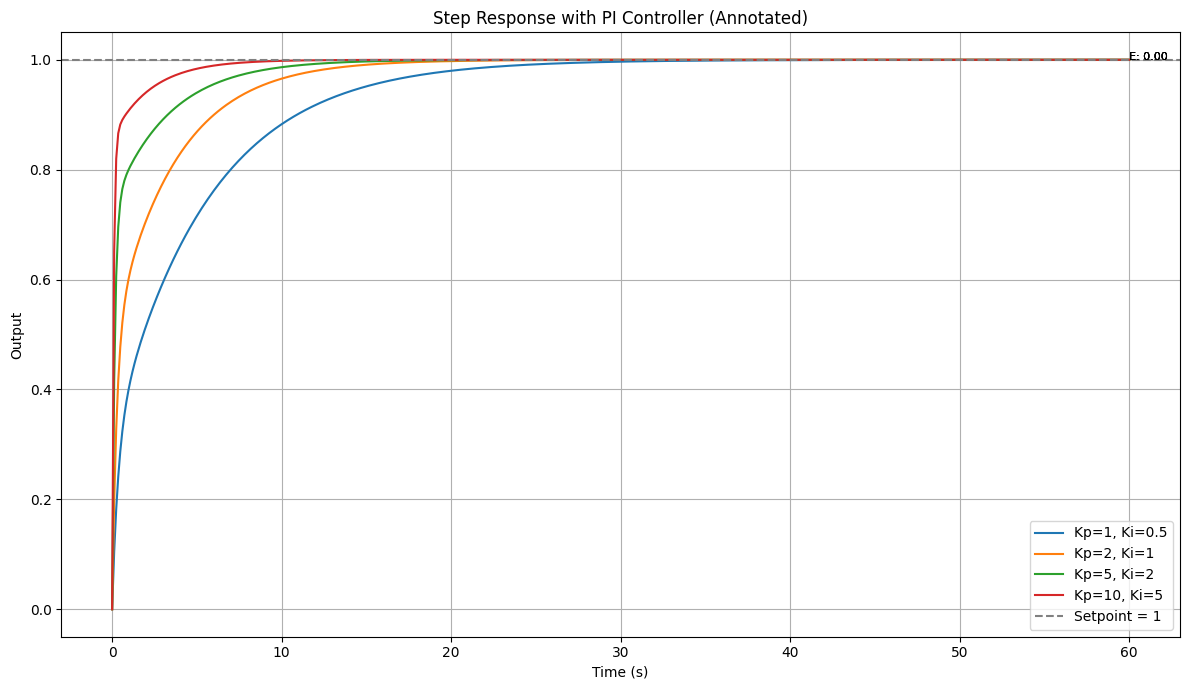

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from scipy.signal import find_peaks

# Plant: G(s) = 1 / (s + 2)
G = ctrl.tf([1], [1, 2])
params = [(1, 0.5), (2, 1), (5, 2), (10, 5)]
t = np.linspace(0, 60, 500)

plt.figure(figsize=(12, 7))

for Kp, Ki in params:
    C = ctrl.tf([Kp, Ki], [1, 0])
    T = ctrl.feedback(C * G, 1)
    t_out, y_out = ctrl.step_response(T, T=t)

    label = f"Kp={Kp}, Ki={Ki}"
    plt.plot(t_out, y_out, label=label)

    # Overshoot (nilai maksimum di atas 1)
    max_val = np.max(y_out)
    max_time = t_out[np.argmax(y_out)]
    if max_val > 1:
        plt.plot(max_time, max_val, 'ro')  # Titik merah overshoot
        plt.text(max_time, max_val + 0.02, f"Overshoot: {max_val:.2f}", color='red')

    # Steady-state error
    ss_error = abs(1 - y_out[-1])
    plt.text(t_out[-1], y_out[-1], f"E: {ss_error:.2f}", fontsize=8)

    # Osilasi: deteksi puncak
    peaks, _ = find_peaks(y_out, height=1.05)
    for peak in peaks:
        plt.plot(t_out[peak], y_out[peak], 'kx')  # X hitam untuk osilasi
        plt.text(t_out[peak], y_out[peak] + 0.03, "oscillate", color='black', fontsize=7)

# Garis setpoint
plt.axhline(1, color='gray', linestyle='--', label="Setpoint = 1")

plt.title("Step Response with PI Controller (Annotated)")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


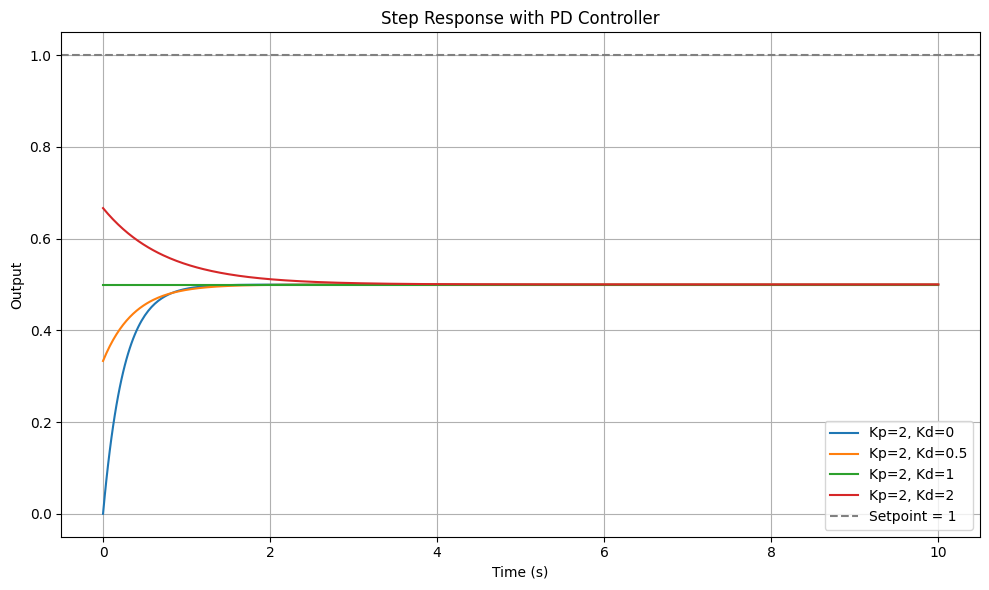

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Plant: G(s) = 1 / (s + 2)
G = ctrl.tf([1], [1, 2])

# Kombinasi PD controller
params = [(2, 0), (2, 0.5), (2, 1), (2, 2)]  # (Kp, Kd)

t = np.linspace(0, 10, 500)
plt.figure(figsize=(10, 6))

for Kp, Kd in params:
    # C(s) = Kd*s + Kp
    C = ctrl.tf([Kd, Kp], [1])
    T = ctrl.feedback(C * G, 1)
    t_out, y_out = ctrl.step_response(T, T=t)
    plt.plot(t_out, y_out, label=f"Kp={Kp}, Kd={Kd}")

plt.axhline(1, color='gray', linestyle='--', label="Setpoint = 1")
plt.title("Step Response with PD Controller")
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


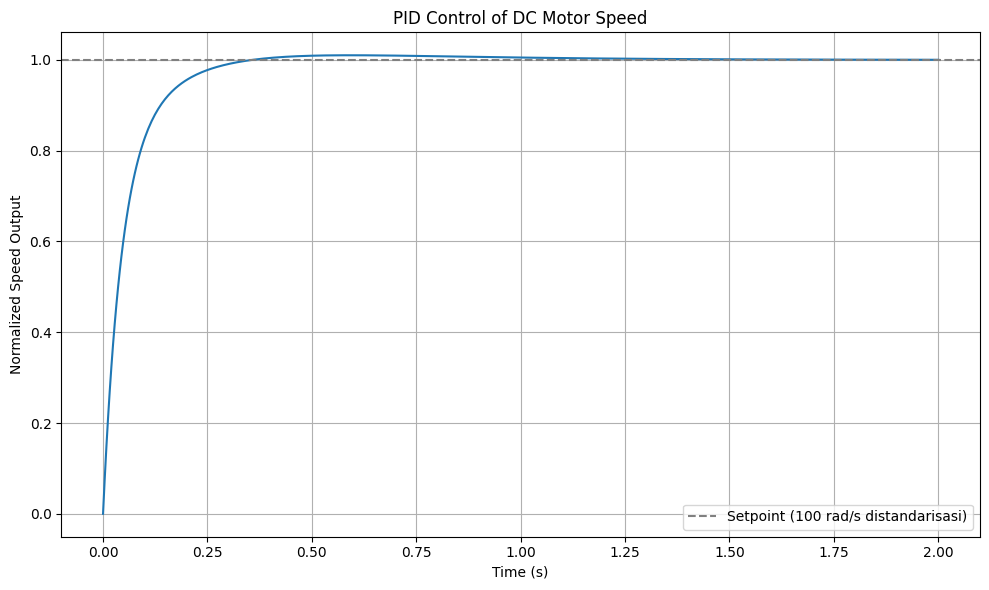

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parameter Motor DC
K = 0.01
J = 0.01
b = 0.1
R = 1
L = 0.5

# Numerator dan denominator dari G(s)
num = [K]
den = [L*J, L*b + R*J, R*b + K**2]

# Transfer function dari motor DC
G = ctrl.tf(num, den)

# Parameter PID
Kp = 100
Ki = 200
Kd = 10

# PID Controller: C(s) = Kd*s^2 + Kp*s + Ki / s
C = ctrl.tf([Kd, Kp, Ki], [1, 0])

# Sistem loop tertutup
T = ctrl.feedback(C * G, 1)

# Simulasi step
t = np.linspace(0, 2, 500)
t_out, y_out = ctrl.step_response(T, T=t)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_out, y_out)
plt.axhline(1, color='gray', linestyle='--', label="Setpoint (100 rad/s distandarisasi)")
plt.title("PID Control of DC Motor Speed")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Speed Output")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
